In [1]:
! pip install voronoi

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

In [129]:
from voronoi.point import Point
from voronoi.segment import Segment
from voronoi.diagram import Diagram
from voronoi.faces import Vertex

In [130]:
def delete_vertex(vertex, obstacles):
    vertex = [vertex.x, vertex.y]
    dlt_veretx = False
    for obs in obstacles:
        dlt_veretx = vertex in obs
        if dlt_veretx:
            break
    return dlt_veretx


In [171]:
obstacles = [
    [[500, 624], [471, 624], [471, 599], [500, 599]],
    [[449, 219], [405, 219], [405, 195], [449, 195]],
    [[341, 640], [314, 640], [314, 606], [341, 606]],
    [[297, 301], [262, 301], [262, 266], [297, 266]],
    [[668, 449], [630, 449], [630, 406], [668, 406]],
    [[69, 551], [69, 199], [375, 22], [681, 199], [681, 551], [375, 728]],
]

In [172]:
segments = []

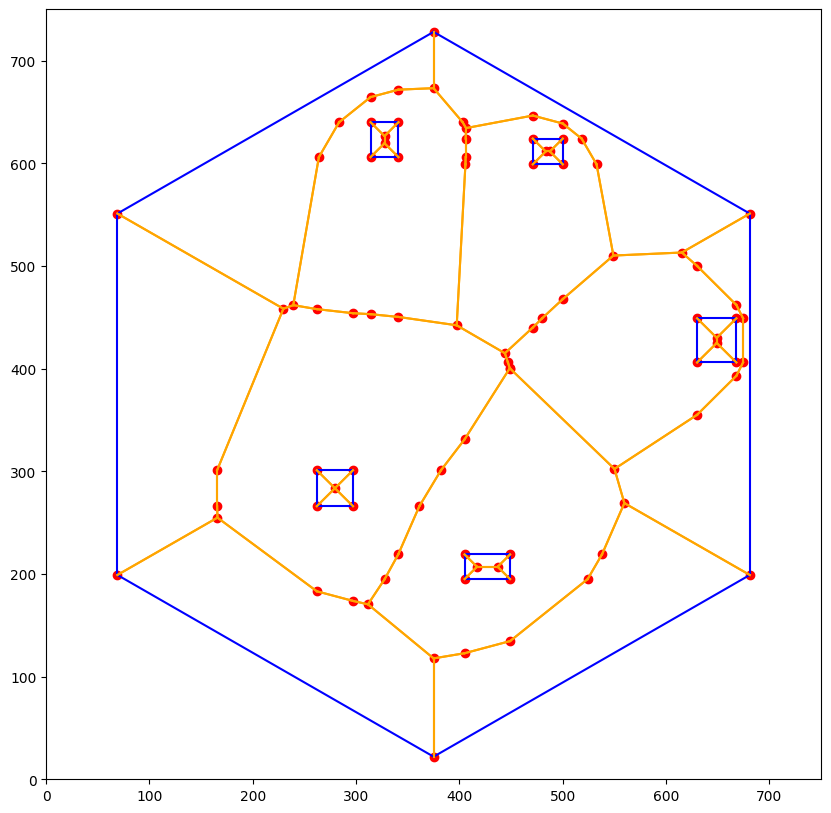

In [177]:
plt.figure(figsize=(10,10))
for obstacle in obstacles:
    for ix in range(0,len(obstacle)-1):
        p1 = obstacle[ix]
        p2 = obstacle[ix+1]
        plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
        segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

    p1 = obstacle[-1]
    p2 = obstacle[0]
    plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
    segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

diagram = Diagram()
diagram.construct([], segments)

for vertex in diagram.vertices:
    plt.scatter(vertex.x, vertex.y, color='red')

final_edges = []
final_vertices = []

for edge in diagram.edges:
    if edge.is_finite and edge.is_primary:
        start = edge.start
        end = edge.end

        plt.plot([start.x, end.x],[start.y, end.y], color="orange")
    # if edge.is_finite and edge.is_primary:
    #     start = edge.start
    #     end = edge.end

    #     if delete_vertex(start, obstacles) or delete_vertex(end, obstacles):
    #         pass
    #     else:
    #         plt.plot([start.x, end.x],[start.y, end.y])
    #         # plt.scatter([start.x, end.x],[start.y, end.y], color='purple')
    #         if edge.twin not in final_edges:
    #             final_edges.append(edge)
    #         if start not in final_vertices:
    #             final_vertices.append(start)

plt.xlim(0,750)
plt.ylim(0,750)
plt.show()

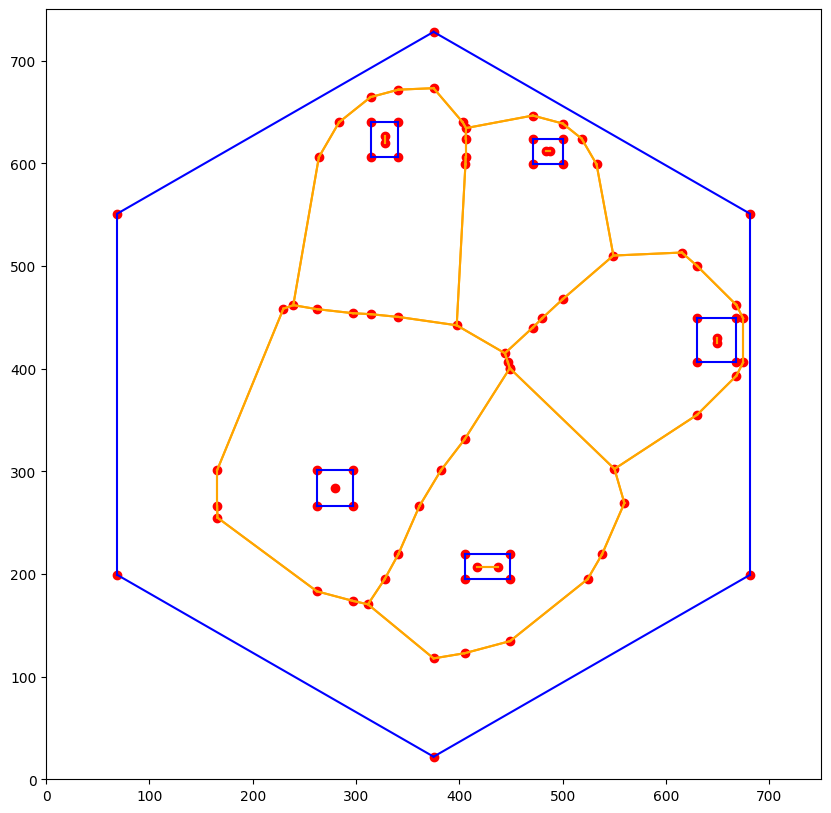

In [190]:
plt.figure(figsize=(10,10))

for obstacle in obstacles:
    for ix in range(0,len(obstacle)-1):
        p1 = obstacle[ix]
        p2 = obstacle[ix+1]
        plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
        segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

    p1 = obstacle[0]
    p2 = obstacle[-1]
    plt.plot([p1[0],p2[0]], [p1[1],p2[1]],  color = 'blue')
    segments.append(Segment(Point(p1[0],p1[1]),Point(p2[0],p2[1])))

diagram = Diagram()
diagram.construct([], segments)

for vertex in diagram.vertices:
    plt.scatter(vertex.x, vertex.y, color='red')

final_edges = []
final_vertices = []

for edge in diagram.edges:
    if edge.is_finite and edge.is_primary:
        start = edge.start
        end = edge.end

        if delete_vertex(start, obstacles) or delete_vertex(end, obstacles):
            pass
        else:
            plt.plot([start.x, end.x],[start.y, end.y], color="orange")
            if edge.twin not in final_edges:
                final_edges.append(edge)
            if start not in final_vertices:
                final_vertices.append(start)


plt.xlim(0,750)
plt.ylim(0,750)
plt.show()

In [119]:
for edge in final_edges:
    site = segments[edge.cell.source_index]
    site_s = np.array([site.start.x, site.start.y])
    site_e = np.array([site.end.x, site.end.y])
    edge_s = np.array([edge.start.x, edge.start.y])
    edge_e = np.array([edge.end.x, edge.end.y])
    dist = np.linalg.norm(np.array([[site_s - edge_s],
                                    [site_s - edge_e],
                                    [site_e - edge_s],
                                    [site_e - edge_e]]), axis=-1)
    
    if len(np.where(dist <= 0.5)[0]) > 0:
        print(edge)

Edge(Vertex(3.0, 7.5), Cell(10, SourceCategory.SEGMENT_END_POINT), False, True)
Edge(Vertex(7.0, 7.5), Cell(10, SourceCategory.REVERSE_SEGMENT), True, True)
Edge(Vertex(7.414213562373095, 7.414213562373095), Cell(9, SourceCategory.SEGMENT_END_POINT), False, True)


In [185]:
class CoordinateMapper():
    def __init__(self, realWorldWidth, realWorldHeight, imageWidth, imageHeight):
        self.realWorldWidth_ = realWorldWidth
        self.realWorldHeight_ = realWorldHeight
        self.imageWidth_ = imageWidth
        self.imageHeight_ = imageHeight

        self.scaleX_ = self.imageWidth_ / self.realWorldWidth_
        self.scaleY_ = self.imageHeight_ / self.realWorldHeight_
        self.offsetX_ = self.imageWidth_ / 2.0
        self.offsetY_ = self.imageHeight_ / 2.0

    def gazebo2img(self, realX, realY):
        imageX = int(-realY * self.scaleX_ + self.offsetX_)
        imageY = int(-realX * self.scaleY_ + self.offsetY_)

        return imageX, imageY

    def img2gazebo(self, imageX, imageY, ):
        realY = -(imageX - self.offsetX_) / self.scaleX_
        realX = -(imageY - self.offsetY_) / self.scaleY_

        return realX, realY

In [186]:
coordinate_mapper = CoordinateMapper(17, 17, 750, 750)

In [187]:
coordinate_mapper.gazebo2img(1,0.8)

(339, 330)

In [188]:
coordinate_mapper.img2gazebo(339, 330)

(1.02, 0.8160000000000001)